<h1><b>Methodologies for Calculating Value at Risk: Application to Portfolio Management</b></h1>
<h3>Juan David Rincón</h3>
<h3>February, 2024</h3>

In [1]:
# Libraries.
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [2]:
# Stocks, dates and parameters definition.
stocks = ["HPQ", "JNJ", "JPM", "PFE", "PG", "TSLA"]
start_date = "2016-01-01"
end_date = "2022-12-31"

# Initial investment.
initial_investment = 1_000_000

# Initial weights of portfolio 
# (Brought from Maximum Efficiency Optimization).
initial_weights = np.array([0.1052, 0.0257, 0.0453, 0.1404, 0.3517, 0.3317])

# Define level of confidence.
alpha = 99

# Number of simulations for Simulated VaR.
num_simulations = 25_000

# Number of days for evaluating VaR evolution.
days_length = 30

In [3]:
# Get stocks prices from yahoo finance.
stocks_prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(stocks_prices_df)

[*********************100%***********************]  6 of 6 completed
                  HPQ         JNJ         JPM        PFE          PG   
Date                                                                   
2016-01-04   8.995454   80.990761   50.781281  22.078997   62.228020  \
2016-01-05   9.080756   81.329300   50.869087  22.237934   62.426556   
2016-01-06   8.755059   80.918205   50.134743  21.844036   61.823078   
2016-01-07   8.351811   79.975166   48.107327  21.698914   61.283142   
2016-01-08   8.204475   79.120743   47.029758  21.422493   60.322369   
...               ...         ...         ...        ...         ...   
2022-12-23  25.813980  172.252960  126.698761  48.845371  147.907349   
2022-12-27  26.113022  172.204422  127.142731  48.185684  149.196289   
2022-12-28  25.601757  171.457123  127.837608  47.874680  147.267746   
2022-12-29  26.084084  172.330612  128.571075  48.374168  147.878265   
2022-12-30  25.920092  171.447388  129.420364  48.289352  146.88006

In [4]:
# Get stocks daily returns.
stocks_daily_returns_df = stocks_prices_df.pct_change().dropna()

# New array of stocks names.
stocks = stocks_daily_returns_df.columns

print(stocks_daily_returns_df)

                 HPQ       JNJ       JPM       PFE        PG      TSLA
Date                                                                  
2016-01-05  0.009483  0.004180  0.001729  0.007199  0.003190  0.000090
2016-01-06 -0.035867 -0.005055 -0.014436 -0.017713 -0.009667 -0.019648
2016-01-07 -0.046059 -0.011654 -0.040439 -0.006644 -0.008734 -0.015477
2016-01-08 -0.017641 -0.010684 -0.022399 -0.012739 -0.015678 -0.021563
2016-01-11  0.006616 -0.006011 -0.001528  0.002258  0.009214 -0.014929
...              ...       ...       ...       ...       ...       ...
2022-12-23  0.003751  0.002542  0.004745  0.003679  0.002825 -0.017551
2022-12-27  0.011584 -0.000282  0.003504 -0.013506  0.008715 -0.114089
2022-12-28 -0.019579 -0.004340  0.005465 -0.006454 -0.012926  0.033089
2022-12-29  0.018840  0.005095  0.005737  0.010433  0.004146  0.080827
2022-12-30 -0.006287 -0.005125  0.006606 -0.001753 -0.006750  0.011164

[1761 rows x 6 columns]


In [5]:
# Historical returns of portfolio.
portfolio_daily_returns_df = stocks_daily_returns_df.dot(initial_weights.T)
print(portfolio_daily_returns_df)

Date
2016-01-05    0.003346
2016-01-06   -0.016961
2016-01-07   -0.016115
2016-01-08   -0.017600
2016-01-11   -0.000922
                ...   
2022-12-23   -0.003636
2022-12-27   -0.035304
2022-12-28    0.003600
2022-12-29    0.032106
2022-12-30    0.000589
Length: 1761, dtype: float64


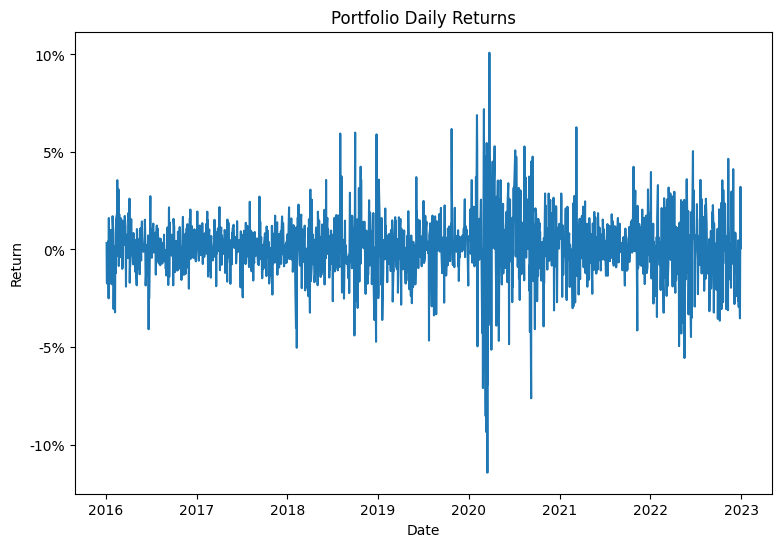

In [6]:
# Portfolio returns graph.
plt.figure(figsize=(9,6))

plt.plot(portfolio_daily_returns_df)

plt.title('Portfolio Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.show()

<h2><b>Historical Method</b></h2>

In [7]:
def Historical_VaR_f(data, conf_level):

    # Value at Risk.
    VaR_rtrn = np.percentile(data, 100-conf_level, method='nearest')

    # Conditional Value at Risk (Expected Shortfall).
    sorted_data = np.sort(data)
    perc_pos = np.where(sorted_data == VaR_rtrn)[0]
    CVaR_rtrn = np.mean(sorted_data[:perc_pos[0]+1])

    # Returns.
    return VaR_rtrn, CVaR_rtrn

In [8]:
VaR_HST_rtrn, CVaR_HST_rtrn = Historical_VaR_f(portfolio_daily_returns_df, alpha)

# Value at Risk.
VaR_HST_value = initial_investment * VaR_HST_rtrn

# Conditional Value at Risk.
CVaR_HST_value = initial_investment * CVaR_HST_rtrn

In [9]:
print("-"*80)

print(f'1 day Historical Value at Risk at {alpha}% level of confidence: {round(100*VaR_HST_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(VaR_HST_value), 2)}')

print("\n")

print(f'1 day Historical Conditional Value at Risk at {alpha}% level of confidence: {round(100*CVaR_HST_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(CVaR_HST_value), 2)}')

print("-"*80)

--------------------------------------------------------------------------------
1 day Historical Value at Risk at 99% level of confidence: -4.31%
The portfolio could lose $43105.08


1 day Historical Conditional Value at Risk at 99% level of confidence: -5.98%
The portfolio could lose $59799.32
--------------------------------------------------------------------------------


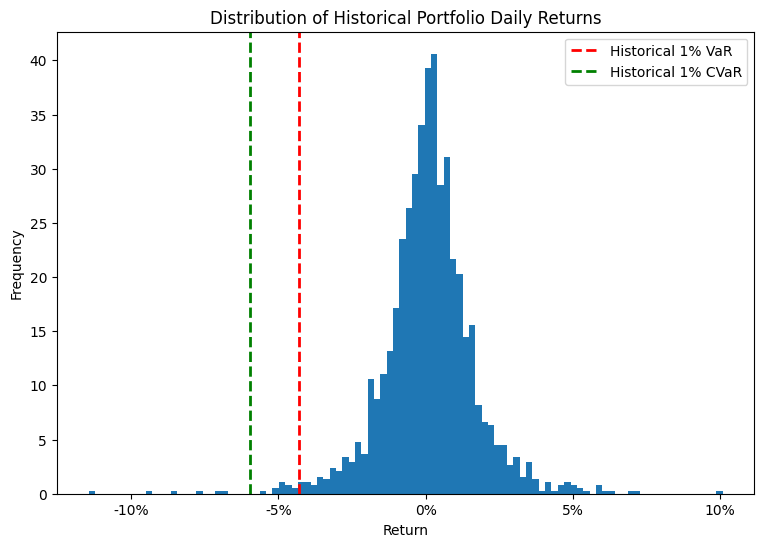

In [10]:
# Distribution of Historical Portfolio Daily Returns.
plt.figure(figsize=(9,6))

plt.hist(portfolio_daily_returns_df, bins = 100, density=True)
plt.axvline(x=VaR_HST_rtrn, color='red', linestyle='dashed', linewidth=2, label=f'Historical {100-alpha}% VaR')
plt.axvline(x=CVaR_HST_rtrn, color='green', linestyle='dashed', linewidth=2, label=f'Historical {100-alpha}% CVaR')

plt.title('Distribution of Historical Portfolio Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter('{:.0%}'.format)
plt.legend()
plt.show()

In [11]:
# Evolution of Historical VaR in a period.
VaR_HST_days_array = []

for i in range(1, days_length+1):
    VaR_HST_days_array.append(VaR_HST_rtrn * np.sqrt(i))

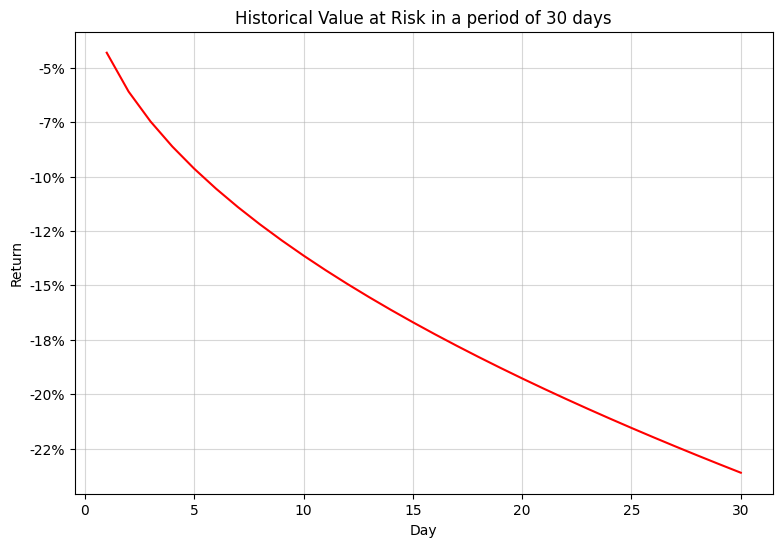

In [12]:
# Historical Value at Risk in a period of N days.
plt.figure(figsize=(9,6))

plt.plot(range(1, days_length+1), VaR_HST_days_array, 'r')

plt.title(f'Historical Value at Risk in a period of {days_length} days')
plt.xlabel('Day')
plt.ylabel('Return')

plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.grid(alpha=0.5)
plt.show()

<h2><b>Parametric Method</b></h2>

In [13]:
# Portfolio Mean Daily Return.
portfolio_mean_rtrn = np.mean(portfolio_daily_returns_df)
print(f'Average Portfolio Daily Return: {round(100*portfolio_mean_rtrn, 2)}%')

Average Portfolio Daily Return: 0.1%


In [14]:
# Covariance matrix of portfolio stocks returns.
portfolio_cov_matrix = np.cov(portfolio_daily_returns_df, rowvar=False)

# Portfolio Daily Returns Std. Deviation.
porfolio_stdev_rtrn = np.sqrt(np.dot(initial_weights, np.dot(portfolio_cov_matrix, initial_weights.T)))
print(f'Std. Deviation of Portfolio Daily Returns: {round(100*porfolio_stdev_rtrn, 2)}%')

Std. Deviation of Portfolio Daily Returns: 0.82%


In [15]:
def Parametric_VaR_f(data_mean, data_stdev, conf_level):

    # Value at Risk.
    VaR_rtrn = data_mean - norm.ppf(conf_level/100)*data_stdev

    # Conditional Value at Risk.
    CVaR_rtrn = data_mean - data_stdev * ((1/(1- conf_level/100))* norm.pdf(norm.ppf(conf_level/100)))

    # Returns.
    return VaR_rtrn, CVaR_rtrn

In [16]:
VaR_PRM_rtrn, CVaR_PRM_rtrn = Parametric_VaR_f(portfolio_mean_rtrn, porfolio_stdev_rtrn, alpha)

# Value at Risk.
VaR_PRM_value = initial_investment * VaR_PRM_rtrn

# Conditional Value at Risk.
CVaR_PRM_value = initial_investment * CVaR_PRM_rtrn

In [17]:
print("-"*80)

print(f'1 day Parametric Value at Risk at {alpha}% level of confidence: {round(100*VaR_PRM_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(VaR_PRM_value), 2)}')

print("\n")

print(f'1 day Parametric Conditional Value at Risk at {alpha}% level of confidence: {round(100*CVaR_PRM_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(CVaR_PRM_value), 2)}')

print("-"*80)

--------------------------------------------------------------------------------
1 day Parametric Value at Risk at 99% level of confidence: -1.8%
The portfolio could lose $18008.07


1 day Parametric Conditional Value at Risk at 99% level of confidence: -2.08%
The portfolio could lose $20782.11
--------------------------------------------------------------------------------


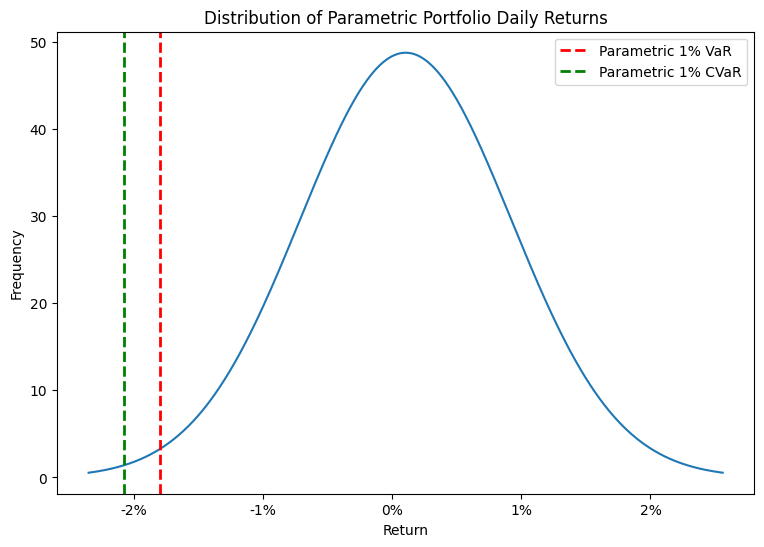

In [18]:
# Distribution of Parametric Portfolio Daily Returns
plt.figure(figsize=(9,6))

x_tp = np.linspace(portfolio_mean_rtrn - 3*porfolio_stdev_rtrn, portfolio_mean_rtrn + 3*porfolio_stdev_rtrn, 1000)

plt.plot(x_tp, norm.pdf(x_tp, portfolio_mean_rtrn, porfolio_stdev_rtrn))
plt.axvline(x=VaR_PRM_rtrn, color='red', linestyle='dashed', linewidth=2, label=f'Parametric {100-alpha}% VaR')
plt.axvline(x=CVaR_PRM_rtrn, color='green', linestyle='dashed', linewidth=2, label=f'Parametric {100-alpha}% CVaR')

plt.title('Distribution of Parametric Portfolio Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter('{:.0%}'.format)
plt.legend()
plt.show()

In [19]:
# Evolution of Parametric VaR in a period.
VaR_PRM_days_array = []

for i in range(1, days_length+1):
    VaR_PRM_days_array.append(VaR_PRM_rtrn * np.sqrt(i))

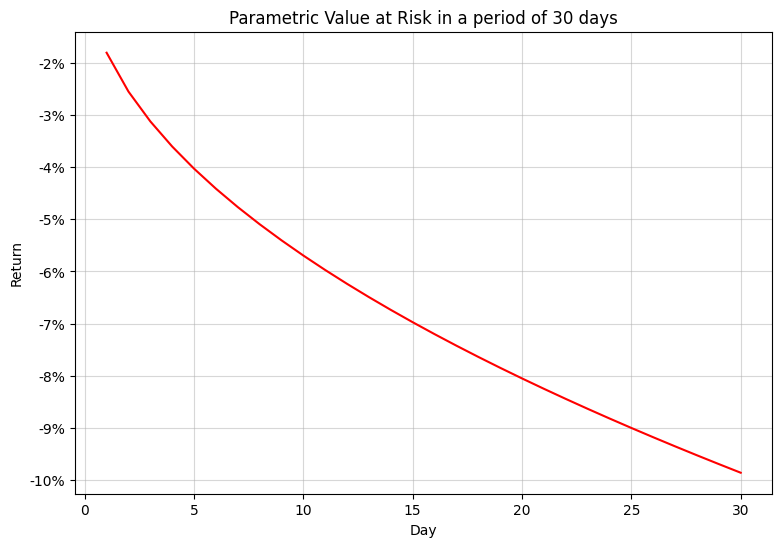

In [20]:
# Parametric Value at Risk in a period of N days.
plt.figure(figsize=(9,6))

plt.plot(range(1, days_length+1), VaR_PRM_days_array, 'r')

plt.title(f'Parametric Value at Risk in a period of {days_length} days')
plt.xlabel('Day')
plt.ylabel('Return')

plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.grid(alpha=0.5)
plt.show()

<h2><b>Simulation Method</b></h2>

In [21]:
def Simulated_VaR_f(num_simulations, mean_rtrn, stdev_rtrn, conf_level):

    # Simulation results.
    simulation_results = []
    for _ in range(num_simulations):
        z_score = random.gauss(0,1)
        simulation_results.append(mean_rtrn + z_score*stdev_rtrn)

    # Value at Risk.
    VaR_rtrn = np.percentile(simulation_results, 100-conf_level, method='nearest')

    # Conditional Value at Risk (Expected Shortfall).
    sorted_data = np.sort(simulation_results)
    perc_pos = np.where(sorted_data == VaR_rtrn)[0]
    CVaR_rtrn = np.mean(sorted_data[:perc_pos[0]+1])

    # Returns.
    return VaR_rtrn, CVaR_rtrn, simulation_results

In [22]:
VaR_SIM_rtrn, CVaR_SIM_rtrn, simulation_results  = Simulated_VaR_f(num_simulations, portfolio_mean_rtrn, porfolio_stdev_rtrn, alpha)

# Value at Risk.
VaR_SIM_value = initial_investment * VaR_SIM_rtrn

# Conditional Value at Risk.
CVaR_SIM_value = initial_investment * CVaR_SIM_rtrn

In [23]:
print("-"*80)

print(f'1 day Simulated Value at Risk at {alpha}% level of confidence: {round(100*VaR_SIM_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(VaR_SIM_value), 2)}')

print("\n")

print(f'1 day Simulated Conditional Value at Risk at {alpha}% level of confidence: {round(100*CVaR_SIM_rtrn, 2)}%')
print(f'The portfolio could lose ${round(abs(CVaR_SIM_value), 2)}')

print("-"*80)

--------------------------------------------------------------------------------
1 day Simulated Value at Risk at 99% level of confidence: -1.79%
The portfolio could lose $17893.43


1 day Simulated Conditional Value at Risk at 99% level of confidence: -2.03%
The portfolio could lose $20343.49
--------------------------------------------------------------------------------


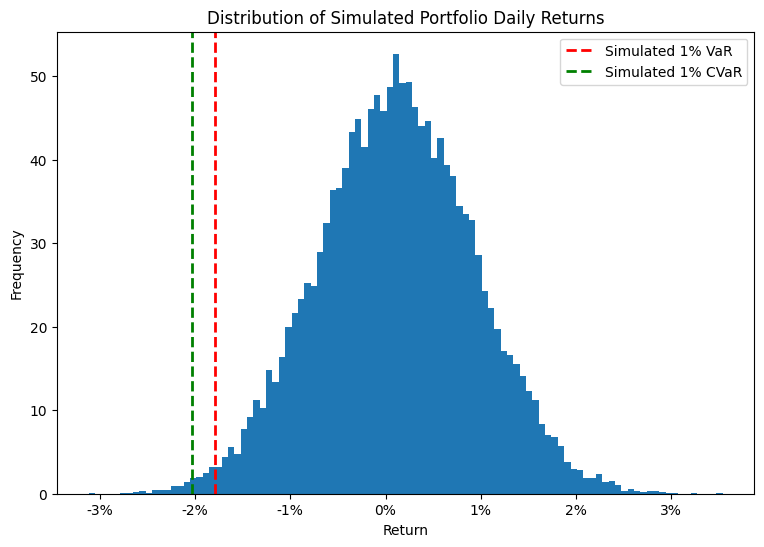

In [24]:
# Distribution of Simulated Portfolio Daily Returns.
plt.figure(figsize=(9,6))

plt.hist(simulation_results, bins = 100, density=True)
plt.axvline(x=VaR_SIM_rtrn, color='red', linestyle='dashed', linewidth=2, label=f'Simulated {100-alpha}% VaR')
plt.axvline(x=CVaR_SIM_rtrn, color='green', linestyle='dashed', linewidth=2, label=f'Simulated {100-alpha}% CVaR')

plt.title('Distribution of Simulated Portfolio Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter('{:.0%}'.format)
plt.legend()
plt.show()

In [25]:
# Evolution of Simulated VaR in a period.
VaR_SIM_days_array = []

for i in range(1, days_length+1):
    VaR_SIM_days_array.append(VaR_SIM_rtrn * np.sqrt(i))

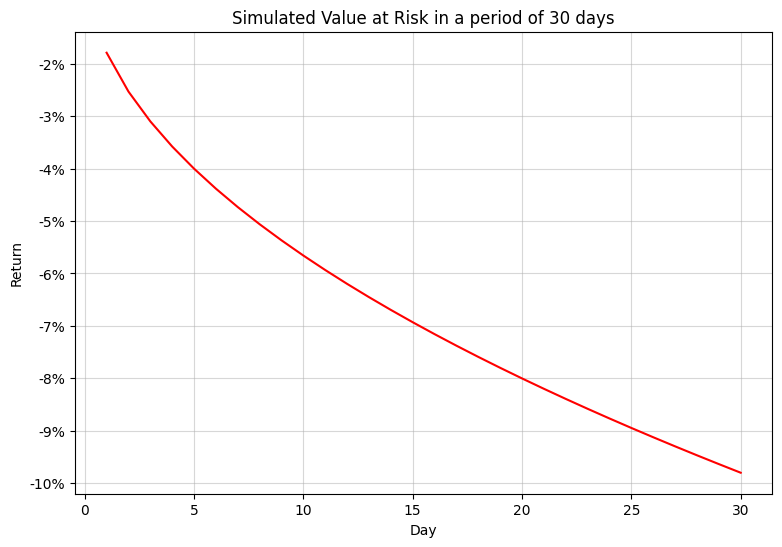

In [26]:
# Simulated Value at Risk in a period of N days.
plt.figure(figsize=(9,6))

plt.plot(range(1, days_length+1), VaR_SIM_days_array, 'r')

plt.title(f'Simulated Value at Risk in a period of {days_length} days')
plt.xlabel('Day')
plt.ylabel('Return')

plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
# Juan David Rincon
# Febrero 2024